**Course:** COSC2753 - Machine Learning <br>
**Students:** Vu Anh Tu (s3685121), Kim Sungjin (s3695340) <br>
**Lecturer:** Dr. Duy Dang-Pham <br>
**Submission Date:** 24/05/2021

<h1><center>Assignment 2: Machine Learning Project</center></h1>

# 1. Data Preprocessing

## 1.1. Import Datasets

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import tensorflow as tf

# Ensure reproducibility
import random
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [ ]:
# Import main dataset
main_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Image_classification_data/data_labels_mainData.csv')
main_data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [ ]:
# Import extra dataset
extra_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Image_classification_data/data_labels_extraData.csv')
extra_data

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [ ]:
# Check for missing values in main dataset
main_data.isna().sum()

InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
dtype: int64

In [ ]:
# Check for missing values in extra dataset
extra_data.isna().sum()

InstanceID     0
patientID      0
ImageName      0
isCancerous    0
dtype: int64

## 1.2. Convert Images to Numpy Arrays and Save to Files

In [ ]:
# Import libraries
import PIL
from PIL import Image

In [ ]:
# X_main_data = []
# dir = '/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Image_classification_data/patch_images/'

In [ ]:
# Import all images from maindataset, convert to numpy arrays and save to list X_main_data

# for index, row in main_data.iterrows():
#   image = Image.open(dir + str(row['InstanceID']) + '.png')
#   rgb_array = np.array(image)
#   X_main_data.append(rgb_array)

In [ ]:
# Save the arrays to file for later use

# X_main_data = np.array(X_main_data)
# np.save('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/X_main_data.npy', X_main_data)

In [ ]:
# Do the same for images from extra dataset

# X_extra_data = []
# for index, row in extra_data.iterrows():
#   image = Image.open(dir + str(row['InstanceID']) + '.png')
#   rgb_array = np.array(image)
#   X_extra_data.append(rgb_array)
# X_extra_data = np.array(X_extra_data)
# np.save('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/X_extra_data.npy', X_extra_data)

## 1.3. Transform and Split Data

In [ ]:
# Load converted images from main dataset
X_main_data = np.load('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/X_main_data.npy')
X_main_data.shape

(9896, 27, 27, 3)

In [ ]:
# Load converted images from extra dataset
X_extra_data = np.load('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/X_extra_data.npy')
X_extra_data.shape

(10384, 27, 27, 3)

In [ ]:
# Scale the numbers to 0-1 range
X_main_data = X_main_data.astype('float32')/255
X_extra_data = X_extra_data.astype('float32')/255

In [ ]:
# Reserve a test set for classification task
X_main_class, X_main_test_class, Y_main_class, Y_main_test_class = model_selection.train_test_split(X_main_data,
                                                                            np.array(main_data['cellType']),
                                                                            stratify = main_data['cellType'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [ ]:
# Create train and validation sets for classification task
X_main_train_class, X_main_val_class, Y_main_train_class, Y_main_val_class = model_selection.train_test_split(X_main_class,
                                                                                      Y_main_class,
                                                                                      stratify = Y_main_class,
                                                                                      test_size = 0.2,
                                                                                      random_state = 0)

In [ ]:
# Convert from RGB to grayscale arrays
X_main_train_gray_class = np.dot(X_main_train_class[..., :3], [0.2989, 0.5870, 0.1140]).reshape(-1, 27, 27, 1)
X_main_val_gray_class = np.dot(X_main_val_class[..., :3], [0.2989, 0.5870, 0.1140]).reshape(-1, 27, 27, 1)
X_main_test_gray_class = np.dot(X_main_test_class[..., :3], [0.2989, 0.5870, 0.1140]).reshape(-1, 27, 27, 1)

In [ ]:
# Flatten the grayscale arrays to feed into traditional algorithms
X_main_train_gray_flattened_class = X_main_train_gray_class.reshape(-1, 729)
X_main_val_gray_flattened_class = X_main_val_gray_class.reshape(-1, 729)
X_main_test_gray_flattened_class = X_main_test_gray_class.reshape(-1, 729)

In [ ]:
# Reserve a test set for detection task
X_main_det, X_main_test_det, Y_main_det, Y_main_test_det = model_selection.train_test_split(X_main_data,
                                                                            np.array(main_data['isCancerous']),
                                                                            stratify = main_data['isCancerous'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [ ]:
# Create train and validation sets for detection task
X_main_train_det, X_main_val_det, Y_main_train_det, Y_main_val_det = model_selection.train_test_split(X_main_det,
                                                                                      Y_main_det,
                                                                                      stratify = Y_main_det,
                                                                                      test_size = 0.2,
                                                                                      random_state = 0)

In [ ]:
# Convert from RGB to grayscale arrays
X_main_train_gray_det = np.dot(X_main_train_det[..., :3], [0.2989, 0.5870, 0.1140]).reshape(-1, 27, 27, 1)
X_main_val_gray_det = np.dot(X_main_val_det[..., :3], [0.2989, 0.5870, 0.1140]).reshape(-1, 27, 27, 1)
X_main_test_gray_det = np.dot(X_main_test_det[..., :3], [0.2989, 0.5870, 0.1140]).reshape(-1, 27, 27, 1)

In [ ]:
# Flatten the grayscale arrays to feed into traditional algorithms
X_main_train_gray_flattened_det = X_main_train_gray_det.reshape(-1, 729)
X_main_val_gray_flattened_det = X_main_val_gray_det.reshape(-1, 729)
X_main_test_gray_flattened_det = X_main_test_gray_det.reshape(-1, 729)

In [ ]:
# Split the extra data to train and validation sets
X_extra_train, X_extra_val, Y_extra_train, Y_extra_val = model_selection.train_test_split(X_extra_data,
                                                                                          np.array(extra_data['isCancerous']),
                                                                                          stratify = np.array(extra_data['isCancerous']),
                                                                                          test_size = 0.2,
                                                                                          random_state = 0)

# 2. Data Exploration

## 2.1 RGB Images

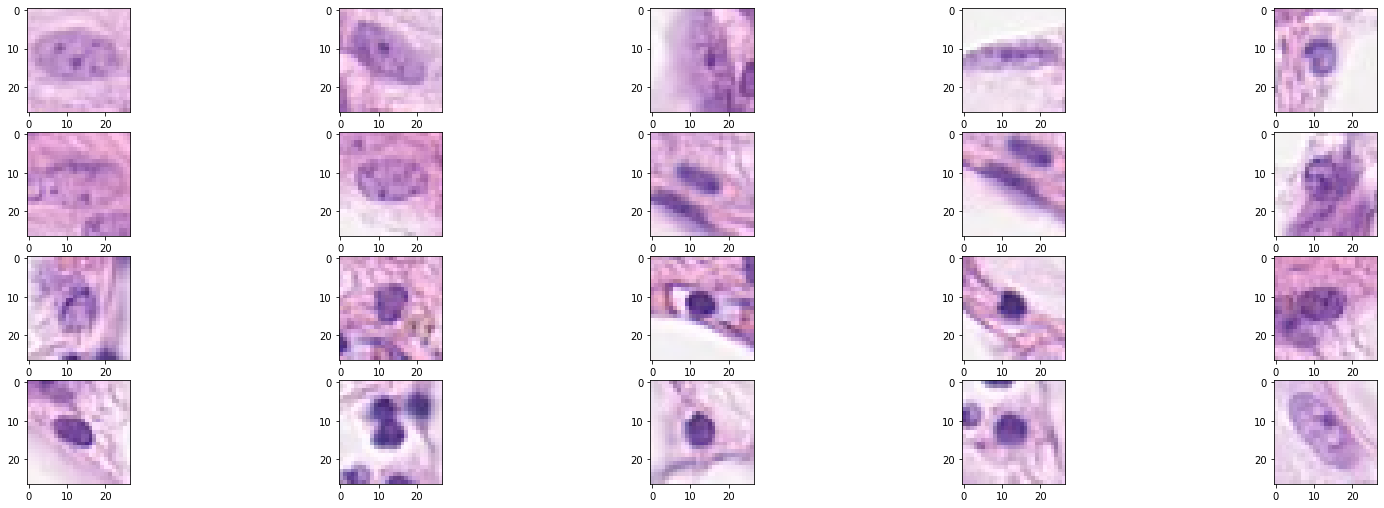

In [ ]:
# Display some RGB images
rgb_images = np.load('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/X_main_data.npy')
plt.figure(figsize=(27,27))
for i in range(20):
  plt.subplot(12,5,i+1)
  plt.imshow(rgb_images[i,:])

The images have very low resolutions (27x27). We notice that there are different hues in the images, so converting them to grayscale could lose potential information.

## 2.2 Grayscale Images

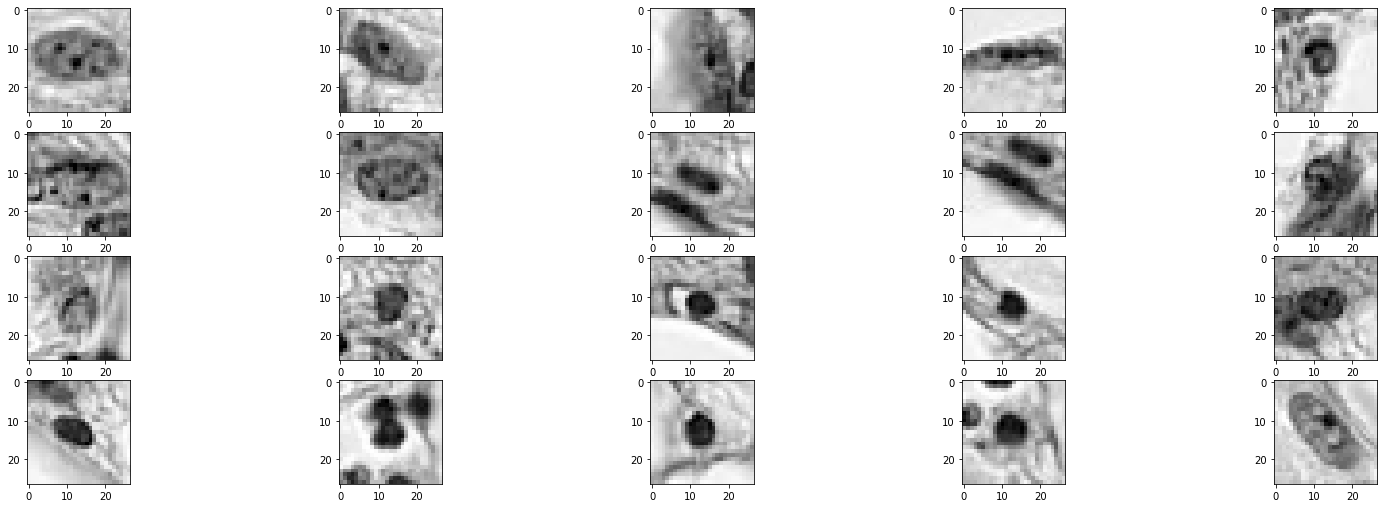

In [ ]:
# Display images in grayscale
gray_images = np.load('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/X_main_data.npy')
gray_images = np.dot(gray_images[..., :3], [0.2989, 0.5870, 0.1140])
plt.figure(figsize=(27,27))
for i in range(20):
  plt.subplot(12,5,i+1)
  plt.imshow(gray_images[i,:], cmap='gray')

Images in grayscale only have different degrees of black and white in their pixels.

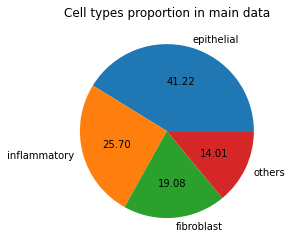

In [ ]:
# Display cell type proportions in main dataset
main_data['cellTypeName'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Cell types proportion in main data")
plt.ylabel("")
plt.show()

Epithelial takes up the majority wit 41%, followed by Inflammatory (26%). Fibroblast and Others are quite similar in their proportions, taking up 19% and 15%, respectively.

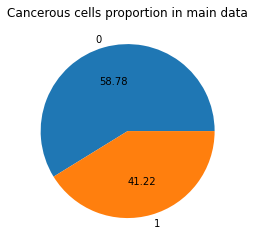

In [ ]:
# Display cancerous and normal cell proportions in main dataset
main_data['isCancerous'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Cancerous cells proportion in main data")
plt.ylabel("")
plt.show()

We have a relatively balanced set between cancerous and normal cells in the main dataset.

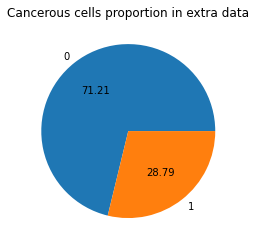

In [ ]:
# Display cancerous and normal cell proportions in extra dataset
extra_data['isCancerous'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Cancerous cells proportion in extra data")
plt.ylabel("")
plt.show()

The extra dataset, on the other hand, has an imbalanced proportion between cancerous and normal cells

[Text(0.5, 1.0, 'Cancerous cells distribution for each cell type')]

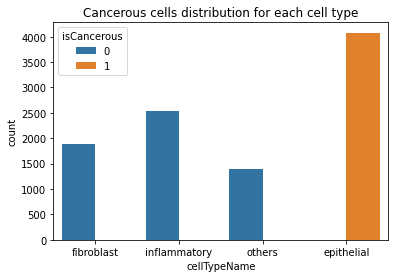

In [ ]:
# Display cancerous and normal cell count for each cell type
sns.countplot(x='cellTypeName', hue='isCancerous', data=main_data).set(title = 'Cancerous cells distribution for each cell type')

All cancerous cells in the main dataset belong to Epithelial type. This could potentially pose a challenge as none of the cell types contain a mixture of normal and cancerous cells, which might create misleading information.

# 3. Cancer Detection Task

## 3.1. Logistic Regression

In [ ]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

In [ ]:
%%time
# Train model
model = LogisticRegression(max_iter=1000, solver='saga')
model.fit(X_main_train_gray_flattened_det, Y_main_train_det)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_det)
Y_val_pred = model.predict(X_main_val_gray_flattened_det)
Y_test_pred = model.predict(X_main_test_gray_flattened_det)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.809539     0.809583  0.809539  0.809561
Validation    0.761995     0.762416  0.761995  0.762191
Test          0.766162     0.766389  0.766162  0.76627
CPU times: user 30.2 s, sys: 46.6 ms, total: 30.2 s
Wall time: 30 s


## 3.2. K-Nearest Neighbors

In [ ]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time
# Train model
model = KNeighborsClassifier()
model.fit(X_main_train_gray_flattened_det, Y_main_train_det)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_det)
Y_val_pred = model.predict(X_main_val_gray_flattened_det)
Y_test_pred = model.predict(X_main_test_gray_flattened_det)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.716361     0.830226  0.716361  0.743635
Validation    0.659722     0.805947  0.659722  0.700119
Test          0.623232     0.777648  0.623232  0.669523
CPU times: user 1min 25s, sys: 59.2 ms, total: 1min 25s
Wall time: 1min 25s


Training time of KNN is relatively longer compared to logistic regression and the model performs worse as well.

## 3.3. Random Forest

In [ ]:
# Import library
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
# Train model
model = RandomForestClassifier()
model.fit(X_main_train_gray_flattened_det, Y_main_train_det)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_det)
Y_val_pred = model.predict(X_main_val_gray_flattened_det)
Y_test_pred = model.predict(X_main_test_gray_flattened_det)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         1            1         1         1
Validation    0.769571     0.781584  0.769571  0.772923
Test          0.788384     0.796542  0.788384  0.790713
CPU times: user 12 s, sys: 6.06 ms, total: 12 s
Wall time: 12 s


Training time is very fast, but random forest overfits on the training set.

## 3.4. XGBoost

In [ ]:
# Import library
from xgboost import XGBClassifier

In [ ]:
%%time
# Train model
model = XGBClassifier()
model.fit(X_main_train_gray_flattened_det, Y_main_train_det)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_det)
Y_val_pred = model.predict(X_main_val_gray_flattened_det)
Y_test_pred = model.predict(X_main_test_gray_flattened_det)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1'])) 

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.870973     0.871458  0.870973  0.871162
Validation    0.782828     0.784675  0.782828  0.783539
Test          0.788889     0.789994  0.788889  0.789343
CPU times: user 25 s, sys: 53.2 ms, total: 25.1 s
Wall time: 25.6 s


XGBoost produces similar results to random forest, but takes up slightly more training time.

## 3.5. Multilayer Perceptron

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 686kB 9.6MB/s 


In [ ]:
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, MaxPooling2D, Flatten, Conv2D, Conv3D, ZeroPadding2D, BatchNormalization
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import tensorflow_addons as tfa

In [ ]:
# Stops training if there is no improvment after 10 epochs and save the best model
model_path = '/content/gdrive/My Drive/Colab Notebooks/Machine Learning'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Build MLP model
model = Sequential()
# Input layer
model.add(Dense(512, input_shape=(27*27*3,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 1st layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 2nd layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1120256   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [ ]:
%%time
# Compile model
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Train model
history = model.fit(X_main_train_det.reshape(-1, 27*27*3), 
                    np.eye(2)[Y_main_train_det], 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_main_val_det.reshape(-1, 27*27*3), np.eye(2)[Y_main_val_det]), 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
99/99 [==============================] - 1s 6ms/step - loss: 0.8984 - accuracy: 0.5991 - val_loss: 0.5396 - val_accuracy: 0.6812

Epoch 00001: val_loss did not improve from 0.53224
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 0.4470 - accuracy: 0.7901 - val_loss: 0.4298 - val_accuracy: 0.7759

Epoch 00002: val_loss improved from 0.53224 to 0.42979, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Machine Learning/assets
Epoch 3/50
99/99 [==============================] - 0s 4ms/step - loss: 0.4277 - accuracy: 0.8019 - val_loss: 0.3714 - val_accuracy: 0.8434

Epoch 00003: val_loss improved from 0.42979 to 0.37139, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Machine Learning/assets
Epoch 4/50
99/99 [==============================] - 0s 4ms/step - 

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_det.reshape(-1, 27*27*3))
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_det.reshape(-1, 27*27*3))
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_det.reshape(-1, 27*27*3))
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.858497     0.879173  0.858497  0.862049
Validation    0.846591     0.867357  0.846591  0.850399
Test          0.846465     0.868583  0.846465  0.850472


MLP produces significantly better results with fast training time. There is also no overfitting on the training set. Next, we will shift our approach to CNN architectures, which are more suitable for image classification.

## 3.6. VGG

This model is based on the famous VGG architecture, but has been modified to suit the low resolution images.

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(27, 27, 3), kernel_regularizer=l2(0.001)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dense(2, activation='softmax'))

model_path = '/content/gdrive/My Drive/Colab Notebooks/Machine Learning'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 27, 27, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
%%time
# Compile model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss='categorical_crossentropy',
               metrics=[tfa.metrics.F1Score(num_classes=2, average='weighted')])

# Train model
history = model.fit(X_main_train_det, 
                    np.eye(2)[Y_main_train_det], 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_main_val_det, np.eye(2)[Y_main_val_det]), 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
99/99 [==============================] - 3s 14ms/step - loss: 1.7766 - f1_score: 0.6340 - val_loss: 1.6660 - val_f1_score: 0.6587

Epoch 00001: val_loss improved from inf to 1.66599, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Machine Learning/assets
Epoch 2/50
99/99 [==============================] - 1s 8ms/step - loss: 1.6105 - f1_score: 0.8071 - val_loss: 1.5511 - val_f1_score: 0.8032

Epoch 00002: val_loss improved from 1.66599 to 1.55110, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Machine Learning/assets
Epoch 3/50
99/99 [==============================] - 1s 8ms/step - loss: 1.5276 - f1_score: 0.8307 - val_loss: 1.5873 - val_f1_score: 0.7763

Epoch 00003: val_loss did not improve from 1.55110
Epoch 4/50
99/99 [==============================] - 1s 8ms/step - los

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_det)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_det)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_det)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.973152     0.973753  0.973152  0.973068
Validation    0.888889     0.889915  0.888889  0.888342
Test          0.895455     0.895467  0.895455  0.89514


## 3.7. Customized Model

This is the customized model we build on our own.

In [ ]:
model = Sequential()
# 1st block
model.add(Conv2D(32, (3,3), padding="same", input_shape=(27,27,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# 2nd block
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# 3rd block
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Dense layers
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 27, 27, 32)        896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 6, 6, 256)         147712    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 3, 3, 256)       

In [ ]:
%%time
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Train model
history = model.fit(X_main_train_det, 
                    np.eye(2)[Y_main_train_det], 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_main_val_det, np.eye(2)[Y_main_val_det]), 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
99/99 [==============================] - 2s 16ms/step - loss: 0.6732 - accuracy: 0.6049 - val_loss: 0.5273 - val_accuracy: 0.7393

Epoch 00001: val_loss improved from 1.26929 to 0.52733, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Machine Learning/assets
Epoch 2/50
99/99 [==============================] - 1s 13ms/step - loss: 0.3624 - accuracy: 0.8419 - val_loss: 0.3235 - val_accuracy: 0.8712

Epoch 00002: val_loss improved from 0.52733 to 0.32355, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Machine Learning/assets
Epoch 3/50
99/99 [==============================] - 1s 12ms/step - loss: 0.3177 - accuracy: 0.8633 - val_loss: 0.2995 - val_accuracy: 0.8876

Epoch 00003: val_loss improved from 0.32355 to 0.29950, saving model to /content/gdrive/My Drive/Colab Notebooks/M

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_det)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_det)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_det)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.979311     0.979911  0.979311  0.979374
Validation    0.899621     0.904588  0.899621  0.900557
Test          0.891414     0.897817  0.891414  0.892609


## 3.8. SC-CNN

This model is replicated from the original paper of the dataset. Since the original work uses grayscale input, we also use grayscale images first but then switch to RGB because it gives much better performance.

### 3.8.1. Gray Scale Input

In [ ]:
# Import library
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Construct model architecture
model = Sequential()

model.add(Conv2D(36, (4, 4), activation='relu', input_shape=(27, 27, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 24, 24, 36)        612       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 10, 10, 48)        15600     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 512)               614912    
_________________________________________________________________
dense_43 (Dense)             (None, 512)             

In [ ]:
%%time
# Data augmentation
def orthogonal_rot(image):
    return np.rot90(image, np.random.choice([0, 1, 2, 3]))

datagen = ImageDataGenerator(
        preprocessing_function = orthogonal_rot,  # Rotate image with random angle
        horizontal_flip=True, # Randomly flip image along x-axis
        vertical_flip=True)  # Randomly flip image along y-axis
datagen.fit(X_main_train_gray_det)

# Compile model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit_generator(datagen.flow(X_main_train_gray_det, 
                                           Y_main_train_det,
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_main_val_gray_det, Y_main_val_det), 
                                  callbacks=[early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
99/99 [==============================] - 2s 14ms/step - loss: 0.6762 - accuracy: 0.5695 - val_loss: 0.6629 - val_accuracy: 0.5878

Epoch 00001: val_loss did not improve from 0.24229
Epoch 2/50
99/99 [==============================] - 1s 13ms/step - loss: 0.6606 - accuracy: 0.5869 - val_loss: 0.6543 - val_accuracy: 0.5878

Epoch 00002: val_loss did not improve from 0.24229
Epoch 3/50
99/99 [==============================] - 1s 12ms/step - loss: 0.6501 - accuracy: 0.5917 - val_loss: 0.6451 - val_accuracy: 0.5878

Epoch 00003: val_loss did not improve from 0.24229
Epoch 4/50
99/99 [==============================] - 1s 12ms/step - loss: 0.6419 - accuracy: 0.5896 - val_loss: 0.6313 - val_accuracy: 0.6004

Epoch 00004: val_loss did not improve from 0.24229
Epoch 5/50
99/99 [==============================] - 1s 12ms/step - loss: 0.6281 - accuracy: 0.6010 - val_loss: 0.6129 - val_accuracy: 0.6622

Epoch 00005: val_loss did not improve from 0.24229
Epoch 6/50
99/99 [=================

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_gray_det)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_gray_det)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_gray_det)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.798168     0.797628  0.798168  0.797392
Validation    0.791035     0.790371  0.791035  0.79031
Test          0.793434     0.792767  0.793434  0.792903


### 3.8.2. RGB Input

In [ ]:
# Construct model architecture
model = Sequential()

model.add(Conv2D(36, (4, 4), activation='relu', input_shape=(27, 27, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 24, 24, 36)        1764      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 10, 10, 48)        15600     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 1200)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               614912    
_________________________________________________________________
dense_46 (Dense)             (None, 512)             

In [ ]:
%%time
# Data augmentation
def orthogonal_rot(image):
    return np.rot90(image, np.random.choice([0, 1, 2, 3]))

datagen = ImageDataGenerator(
        preprocessing_function = orthogonal_rot,  # Rotate image with random angle
        horizontal_flip=True, # Randomly flip images along x-axis
        vertical_flip=True)  # Randomly flip images along y-axis
datagen.fit(X_main_train_det)

# Compile model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit_generator(datagen.flow(X_main_train_det, 
                                           Y_main_train_det,
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_main_val_det, Y_main_val_det), 
                                  callbacks=[early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
99/99 [==============================] - 2s 15ms/step - loss: 0.6786 - accuracy: 0.5554 - val_loss: 0.6434 - val_accuracy: 0.5878

Epoch 00001: val_loss did not improve from 0.24229
Epoch 2/50
99/99 [==============================] - 1s 14ms/step - loss: 0.6317 - accuracy: 0.6099 - val_loss: 0.5815 - val_accuracy: 0.7165

Epoch 00002: val_loss did not improve from 0.24229
Epoch 3/50
99/99 [==============================] - 1s 12ms/step - loss: 0.5595 - accuracy: 0.7303 - val_loss: 0.4864 - val_accuracy: 0.8157

Epoch 00003: val_loss did not improve from 0.24229
Epoch 4/50
99/99 [==============================] - 1s 13ms/step - loss: 0.4754 - accuracy: 0.7800 - val_loss: 0.4801 - val_accuracy: 0.7513

Epoch 00004: val_loss did not improve from 0.24229
Epoch 5/50
99/99 [==============================] - 1s 13ms/step - loss: 0.3902 - accuracy: 0.8296 - val_loss: 0.3887 - val_accuracy: 0.8176

Epoch 00005: val_loss did not improve from 0.24229
Epoch 6/50
99/99 [=================

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_det)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_det)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_det)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.892451     0.895876  0.892451  0.893208
Validation    0.900884     0.904395  0.900884  0.901608
Test          0.892424     0.897063  0.892424  0.893366


## 3.9. RCCNet

This model is replicated from another paper using the same dataset. 

In [ ]:
# Import libraries
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, CSVLogger
from keras import backend as K

In [ ]:
# Customized f1
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Construct model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27,27, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 27, 27, 32)        896       
_________________________________________________________________
batch_normalization_30 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 25, 25, 32)        9248      
_________________________________________________________________
batch_normalization_31 (Batc (None, 25, 25, 32)        128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_32 (Batc (None, 12, 12, 64)      

In [ ]:
%%time
# Reduce learning rate 
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), cooldown=0, patience=6, min_lr=0.5e-15)
# Compile model
adam = Adam(lr=0.00006, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1.0e-6,amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=[f1])

# Data augmentation
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)  # randomly flip images
datagen.fit(X_main_train_det)

# Train model
history = model.fit_generator(datagen.flow(X_main_train_det, 
                                           np.eye(2)[Y_main_train_det],
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_main_val_det, np.eye(2)[Y_main_val_det]), 
                                  callbacks=[lr_reducer, early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
99/99 [==============================] - 7s 48ms/step - loss: 0.6302 - f1: 0.7342 - val_loss: 0.9565 - val_f1: 0.4131

Epoch 00001: val_loss did not improve from 0.24229
Epoch 2/50
99/99 [==============================] - 4s 45ms/step - loss: 0.3731 - f1: 0.8600 - val_loss: 1.7278 - val_f1: 0.4131

Epoch 00002: val_loss did not improve from 0.24229
Epoch 3/50
99/99 [==============================] - 4s 45ms/step - loss: 0.3575 - f1: 0.8628 - val_loss: 1.5669 - val_f1: 0.4156

Epoch 00003: val_loss did not improve from 0.24229
Epoch 4/50
99/99 [==============================] - 4s 44ms/step - loss: 0.3268 - f1: 0.8760 - val_loss: 1.0494 - val_f1: 0.5400

Epoch 00004: val_loss did not improve from 0.24229
Epoch 5/50
99/99 [==============================] - 4s 45ms/step - loss: 0.3157 - f1: 0.8763 - val_loss: 0.4353 - val_f1: 0.8144

Epoch 00005: val_loss did not improve from 0.24229
Epoch 6/50
99/99 [==============================] - 4s 44ms/step - loss: 0.3014 - f1: 0.8843 - 

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_det)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_det)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_det)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_det), precision_score(Y_train_pred, Y_main_train_det, average='weighted'), recall_score(Y_train_pred, Y_main_train_det, average='weighted'), f1_score(Y_train_pred, Y_main_train_det, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_det), precision_score(Y_val_pred, Y_main_val_det, average='weighted'), recall_score(Y_val_pred, Y_main_val_det, average='weighted'), f1_score(Y_val_pred, Y_main_val_det, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_det), precision_score(Y_test_pred, Y_main_test_det, average='weighted'), recall_score(Y_test_pred, Y_main_test_det, average='weighted'), f1_score(Y_test_pred, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.954043     0.954012  0.954043  0.954018
Validation    0.916035     0.91621   0.916035  0.916104
Test          0.912626     0.913728  0.912626  0.912917


# 4. Cell Type Classification Task

## 4.1. Logistic Regression

In [ ]:
%%time
# Train model
model = LogisticRegression(max_iter=1000, solver='saga')
model.fit(X_main_train_gray_flattened_class, Y_main_train_class)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_class)
Y_val_pred = model.predict(X_main_val_gray_flattened_class)
Y_test_pred = model.predict(X_main_test_gray_flattened_class)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.683828     0.750791  0.683828  0.707275
Validation    0.590278     0.661351  0.590278  0.619793
Test          0.577273     0.644625  0.577273  0.604963
CPU times: user 1min 30s, sys: 68.2 ms, total: 1min 30s
Wall time: 1min 30s


## 4.2. K-Nearest Neighbors

In [ ]:
%%time
# Train model
model = KNeighborsClassifier()
model.fit(X_main_train_gray_flattened_class, Y_main_train_class)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_class)
Y_val_pred = model.predict(X_main_val_gray_flattened_class)
Y_test_pred = model.predict(X_main_test_gray_flattened_class)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.478048     0.736688  0.478048  0.483908
Validation    0.383838     0.690294  0.383838  0.39882
Test          0.380303     0.69337   0.380303  0.401436
CPU times: user 1min 27s, sys: 145 ms, total: 1min 27s
Wall time: 1min 26s


## 4.3. Random Forest

In [ ]:
%%time
# Train model
model = RandomForestClassifier()
model.fit(X_main_train_gray_flattened_class, Y_main_train_class)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_class)
Y_val_pred = model.predict(X_main_val_gray_flattened_class)
Y_test_pred = model.predict(X_main_test_gray_flattened_class)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.999842     0.999842  0.999842  0.999842
Validation    0.638258     0.79152   0.638258  0.698983
Test          0.632828     0.77998   0.632828  0.690971
CPU times: user 14 s, sys: 20.8 ms, total: 14.1 s
Wall time: 14 s


## 4.4. XGBoost

In [ ]:
%%time
# Train model
model = XGBClassifier()
model.fit(X_main_train_gray_flattened_class, Y_main_train_class)

# Predict on train, validation and test sets
Y_train_pred = model.predict(X_main_train_gray_flattened_class)
Y_val_pred = model.predict(X_main_val_gray_flattened_class)
Y_test_pred = model.predict(X_main_test_gray_flattened_class)

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.765003     0.832722  0.765003  0.78607
Validation    0.638258     0.750505  0.638258  0.683987
Test          0.638384     0.739972  0.638384  0.679904
CPU times: user 1min 53s, sys: 169 ms, total: 1min 53s
Wall time: 1min 53s


## 4.5. Multilayer Perceptron

In [ ]:
# Build MLP model
model = Sequential()
# input layer
model.add(Dense(512, input_shape=(27*27*3, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 1st layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# 2nd layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               1120256   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)              

In [ ]:
%%time
# Compile model
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Train model
history = model.fit(X_main_train_class.reshape(-1, 27*27*3), 
                    np.eye(4)[Y_main_train_class], 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_main_val_class.reshape(-1, 27*27*3), np.eye(4)[Y_main_val_class]), 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
99/99 [==============================] - 1s 8ms/step - loss: 1.5957 - accuracy: 0.3430 - val_loss: 1.1795 - val_accuracy: 0.4811

Epoch 00001: val_loss did not improve from 0.22586
Epoch 2/50
99/99 [==============================] - 1s 7ms/step - loss: 1.1473 - accuracy: 0.5276 - val_loss: 0.9358 - val_accuracy: 0.6218

Epoch 00002: val_loss did not improve from 0.22586
Epoch 3/50
99/99 [==============================] - 1s 6ms/step - loss: 0.9982 - accuracy: 0.5902 - val_loss: 0.9215 - val_accuracy: 0.6023

Epoch 00003: val_loss did not improve from 0.22586
Epoch 4/50
99/99 [==============================] - 1s 6ms/step - loss: 0.9769 - accuracy: 0.6027 - val_loss: 0.9318 - val_accuracy: 0.6263

Epoch 00004: val_loss did not improve from 0.22586
Epoch 5/50
99/99 [==============================] - 1s 6ms/step - loss: 0.9972 - accuracy: 0.5927 - val_loss: 1.0047 - val_accuracy: 0.5814

Epoch 00005: val_loss did not improve from 0.22586
Epoch 6/50
99/99 [======================

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_class.reshape(-1, 27*27*3))
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_class.reshape(-1, 27*27*3))
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_class.reshape(-1, 27*27*3))
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.705306     0.810093  0.705306  0.732961
Validation    0.694444     0.799214  0.694444  0.72199
Test          0.690404     0.792373  0.690404  0.717577


## 4.6. VGG 

In [ ]:
# Construct model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(27, 27, 3), kernel_regularizer=l2(0.001)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 27, 27, 32)        896       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 128)        

In [ ]:
%%time
# Compile model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
               metrics=[tfa.metrics.F1Score(num_classes=4, average='weighted')])

# Train model
history = model.fit(X_main_train_class, 
                    np.eye(4)[Y_main_train_class], 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_main_val_class, np.eye(4)[Y_main_val_class]), 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
99/99 [==============================] - 4s 24ms/step - loss: 2.4257 - f1_score: 0.3472 - val_loss: 2.3968 - val_f1_score: 0.3454

Epoch 00001: val_loss did not improve from 0.22586
Epoch 2/50
99/99 [==============================] - 2s 17ms/step - loss: 2.2328 - f1_score: 0.5119 - val_loss: 2.2205 - val_f1_score: 0.3983

Epoch 00002: val_loss did not improve from 0.22586
Epoch 3/50
99/99 [==============================] - 2s 17ms/step - loss: 2.0723 - f1_score: 0.5895 - val_loss: 1.9632 - val_f1_score: 0.6014

Epoch 00003: val_loss did not improve from 0.22586
Epoch 4/50
99/99 [==============================] - 2s 17ms/step - loss: 1.9294 - f1_score: 0.6551 - val_loss: 1.9039 - val_f1_score: 0.7030

Epoch 00004: val_loss did not improve from 0.22586
Epoch 5/50
99/99 [==============================] - 2s 17ms/step - loss: 1.9143 - f1_score: 0.6724 - val_loss: 1.8456 - val_f1_score: 0.6804

Epoch 00005: val_loss did not improve from 0.22586
Epoch 6/50
99/99 [=================

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_class)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_class)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_class)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.857865     0.902146  0.857865  0.865453
Validation    0.73548      0.79628   0.73548   0.753274
Test          0.728788     0.803012  0.728788  0.750213


## 4.7. Customized Model

In [ ]:
# Construct model architecture
model = Sequential()
# 1st block
model.add(Conv2D(32, (4,4), padding="same", input_shape=(27,27,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# 2nd block
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
# 3rd block
model.add(Conv2D(256, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Dense layers
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 27, 27, 32)        1568      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 256)         147712    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 3, 3, 256)        

In [ ]:
%%time
# Compile model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=[tfa.metrics.F1Score(num_classes=4, average='weighted')])

# Train model
history = model.fit(X_main_train_class, 
                    np.eye(4)[Y_main_train_class], 
                    epochs=50, 
                    batch_size=64, 
                    validation_data=(X_main_val_class, np.eye(4)[Y_main_val_class]), 
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50
99/99 [==============================] - 2s 17ms/step - loss: 1.1830 - f1_score: 0.4001 - val_loss: 0.8023 - val_f1_score: 0.6528

Epoch 00001: val_loss did not improve from 0.22586
Epoch 2/50
99/99 [==============================] - 1s 12ms/step - loss: 0.8276 - f1_score: 0.6486 - val_loss: 0.7151 - val_f1_score: 0.6987

Epoch 00002: val_loss did not improve from 0.22586
Epoch 3/50
99/99 [==============================] - 1s 12ms/step - loss: 0.7431 - f1_score: 0.6877 - val_loss: 0.6717 - val_f1_score: 0.7281

Epoch 00003: val_loss did not improve from 0.22586
Epoch 4/50
99/99 [==============================] - 1s 11ms/step - loss: 0.6833 - f1_score: 0.7153 - val_loss: 0.6526 - val_f1_score: 0.7388

Epoch 00004: val_loss did not improve from 0.22586
Epoch 5/50
99/99 [==============================] - 1s 11ms/step - loss: 0.6635 - f1_score: 0.7316 - val_loss: 0.7315 - val_f1_score: 0.7178

Epoch 00005: val_loss did not improve from 0.22586
Epoch 6/50
99/99 [=================

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_class)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_class)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_class)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.965888     0.966678  0.965888  0.965665
Validation    0.753157     0.755315  0.753157  0.750201
Test          0.745455     0.74636   0.745455  0.742876


## 4.8. Softmax CNN

This model is replicated from the paper which goes with the original dataset. Similarly to the SC-CNN model above, we try both grayscale (like the paper) and RGB input (which produces better results)

### 4.8.1. Gray Scale Input

In [ ]:
# Construct model architecture
model = Sequential()

model.add(Conv2D(36, (4, 4), activation='relu', input_shape=(27, 27, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 24, 24, 36)        612       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 48)        15600     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               614912    
_________________________________________________________________
dense_24 (Dense)             (None, 512)              

In [ ]:
%%time
# Data augmentation
def orthogonal_rot(image):
    return np.rot90(image, np.random.choice([0, 1, 2, 3]))

datagen = ImageDataGenerator(
        preprocessing_function = orthogonal_rot,  # Rotate image with random angle
        horizontal_flip=True, # Randomly flip image along x-axis
        vertical_flip=True)  # Randomly flip image along y-axis
datagen.fit(X_main_train_gray_class)

# Compile model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit_generator(datagen.flow(X_main_train_gray_class, 
                                           Y_main_train_class,
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_main_val_gray_class, Y_main_val_class), 
                                  callbacks=[early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
99/99 [==============================] - 2s 15ms/step - loss: 1.3570 - accuracy: 0.3476 - val_loss: 1.3167 - val_accuracy: 0.4122

Epoch 00001: val_loss did not improve from 0.22586
Epoch 2/50
99/99 [==============================] - 1s 12ms/step - loss: 1.3203 - accuracy: 0.3982 - val_loss: 1.3016 - val_accuracy: 0.4122

Epoch 00002: val_loss did not improve from 0.22586
Epoch 3/50
99/99 [==============================] - 1s 12ms/step - loss: 1.2947 - accuracy: 0.4228 - val_loss: 1.2878 - val_accuracy: 0.4773

Epoch 00003: val_loss did not improve from 0.22586
Epoch 4/50
99/99 [==============================] - 1s 12ms/step - loss: 1.2776 - accuracy: 0.4404 - val_loss: 1.2650 - val_accuracy: 0.4242

Epoch 00004: val_loss did not improve from 0.22586
Epoch 5/50
99/99 [==============================] - 1s 12ms/step - loss: 1.2609 - accuracy: 0.4596 - val_loss: 1.2369 - val_accuracy: 0.4438

Epoch 00005: val_loss did not improve from 0.22586
Epoch 6/50
99/99 [=================

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_gray_class)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_gray_class)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_gray_class)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.647189     0.764018  0.647189  0.694564
Validation    0.652146     0.771359  0.652146  0.699135
Test          0.642424     0.756013  0.642424  0.689566


### 4.8.2. RGB Input

In [ ]:
## Construct model architecture
model = Sequential()

model.add(Conv2D(36, (4, 4), activation='relu', input_shape=(27, 27, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 24, 24, 36)        1764      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 36)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 10, 10, 48)        15600     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               614912    
_________________________________________________________________
dense_27 (Dense)             (None, 512)              

In [ ]:
%%time
# Data augmentation
def orthogonal_rot(image):
    return np.rot90(image, np.random.choice([0, 1, 2, 3]))

datagen = ImageDataGenerator(
        preprocessing_function = orthogonal_rot,
        horizontal_flip=True,
        vertical_flip=True)  
datagen.fit(X_main_train_class)

# Compile model
model.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
history = model.fit_generator(datagen.flow(X_main_train_class, 
                                           Y_main_train_class,
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_main_val_class, Y_main_val_class), 
                                  callbacks=[early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
99/99 [==============================] - 2s 18ms/step - loss: 1.3856 - accuracy: 0.2496 - val_loss: 1.3797 - val_accuracy: 0.2569

Epoch 00001: val_loss did not improve from 0.22586
Epoch 2/50
99/99 [==============================] - 1s 12ms/step - loss: 1.3459 - accuracy: 0.3730 - val_loss: 1.2933 - val_accuracy: 0.4122

Epoch 00002: val_loss did not improve from 0.22586
Epoch 3/50
99/99 [==============================] - 1s 13ms/step - loss: 1.2787 - accuracy: 0.4231 - val_loss: 1.2498 - val_accuracy: 0.5025

Epoch 00003: val_loss did not improve from 0.22586
Epoch 4/50
99/99 [==============================] - 1s 13ms/step - loss: 1.2316 - accuracy: 0.4861 - val_loss: 1.1463 - val_accuracy: 0.5259

Epoch 00004: val_loss did not improve from 0.22586
Epoch 5/50
99/99 [==============================] - 1s 12ms/step - loss: 1.1231 - accuracy: 0.5375 - val_loss: 1.0385 - val_accuracy: 0.5732

Epoch 00005: val_loss did not improve from 0.22586
Epoch 6/50
99/99 [=================

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model.predict(X_main_train_class)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model.predict(X_main_val_class)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model.predict(X_main_test_class)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.721415     0.811468  0.721415  0.757456
Validation    0.715909     0.79906   0.715909  0.748504
Test          0.723737     0.818899  0.723737  0.762065


## 4.9. RCCNet

In [ ]:
# Construct model architecture
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27,27, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(4, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        2

In [ ]:
%%time
# Reduce learning rate
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), cooldown=0, patience=6, min_lr=0.5e-15)
adam = Adam(lr=0.00006, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1.0e-6,amsgrad=False)
# Compile model
model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=[f1])

# Data augmentation
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)  # randomly flip images
datagen.fit(X_main_train_class)

# Train model
history = model2.fit_generator(datagen.flow(X_main_train_class, 
                                           np.eye(4)[Y_main_train_class],
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_main_val_class, np.eye(4)[Y_main_val_class]), 
                                  callbacks=[lr_reducer, early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
99/99 [==============================] - 37s 35ms/step - loss: 1.3311 - f1: 0.5031 - val_loss: 1.4143 - val_f1: 0.4214

Epoch 00001: val_loss improved from inf to 1.41427, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/Machine Learning/assets
Epoch 2/50
99/99 [==============================] - 3s 30ms/step - loss: 0.9627 - f1: 0.6522 - val_loss: 1.6508 - val_f1: 0.4162

Epoch 00002: val_loss did not improve from 1.41427
Epoch 3/50
99/99 [==============================] - 3s 30ms/step - loss: 0.9082 - f1: 0.6606 - val_loss: 1.5758 - val_f1: 0.4432

Epoch 00003: val_loss did not improve from 1.41427
Epoch 4/50
99/99 [==============================] - 3s 29ms/step - loss: 0.8116 - f1: 0.6931 - val_loss: 1.2993 - val_f1: 0.5523

Epoch 00004: val_loss improved from 1.41427 to 1.29929, saving model to /content/gdrive/My Drive/Colab Notebooks/Machine Learning
INFO:tensorflow:Asset

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw = model2.predict(X_main_train_class)
Y_train_pred = [np.argmax(y) for y in Y_train_pred_raw]
Y_val_pred_raw = model2.predict(X_main_val_class)
Y_val_pred = [np.argmax(y) for y in Y_val_pred_raw]
Y_test_pred_raw = model2.predict(X_main_test_class)
Y_test_pred = [np.argmax(y) for y in Y_test_pred_raw]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred, Y_main_train_class), precision_score(Y_train_pred, Y_main_train_class, average='weighted'), recall_score(Y_train_pred, Y_main_train_class, average='weighted'), f1_score(Y_train_pred, Y_main_train_class, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred, Y_main_val_class), precision_score(Y_val_pred, Y_main_val_class, average='weighted'), recall_score(Y_val_pred, Y_main_val_class, average='weighted'), f1_score(Y_val_pred, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred, Y_main_test_class), precision_score(Y_test_pred, Y_main_test_class, average='weighted'), recall_score(Y_test_pred, Y_main_test_class, average='weighted'), f1_score(Y_test_pred, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.821857     0.8198    0.821857  0.817497
Validation    0.76452      0.759263  0.76452   0.758061
Test          0.768687     0.763476  0.768687  0.762645


# 5. Model Improvement

## 5.1. Cancer Detection Model

We pick the RCCNet model because it outperforms the rest. To improve cancer detection task, we will combine the train and validation sets of the main and extra data to train a new model. The intuition is that the new model would perform better thanks to more available data.

In [ ]:
# Construct model architecture
model1A = Sequential()

model1A.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27,27, 3)))
model1A.add(BatchNormalization())
model1A.add(Conv2D(32, (3, 3), activation='relu'))
model1A.add(BatchNormalization())
model1A.add(MaxPooling2D(pool_size=(2, 2)))

model1A.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1A.add(BatchNormalization())
model1A.add(Conv2D(64, (3, 3), activation='relu'))
model1A.add(BatchNormalization())
model1A.add(MaxPooling2D(pool_size=(2, 2)))

model1A.add(Flatten())
model1A.add(Dense(512, activation='relu'))
model1A.add(BatchNormalization())
model1A.add(Dropout(0.2))
model1A.add(Dense(512, activation='relu'))
model1A.add(BatchNormalization())
model1A.add(Dropout(0.2))
model1A.add(Dense(2, activation='softmax'))

model1A.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 27, 27, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 27, 27, 32)        128       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 25, 25, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 25, 25, 32)        128       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_44 (Batc (None, 12, 12, 64)      

In [ ]:
%%time
# Reduce learning rate 
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), cooldown=0, patience=6, min_lr=0.5e-15)
# Compile model
adam = Adam(lr=0.00006, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1.0e-6,amsgrad=False)
model1A.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=[f1])

# Concat data
X_extra_train, X_extra_val, Y_extra_train, Y_extra_val
X_train_1A = np.concatenate((X_main_train_det, X_extra_train), axis=0)
Y_train_1A = np.concatenate((Y_main_train_det, Y_extra_train), axis=0)
X_val_1A = np.concatenate((X_main_val_det, X_extra_val), axis=0)
Y_val_1A = np.concatenate((Y_main_val_det, Y_extra_val), axis=0)

# Data augmentation
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)  # randomly flip images
datagen.fit(X_train_1A)

# Train model
history = model1A.fit_generator(datagen.flow(X_train_1A, 
                                           np.eye(2)[Y_train_1A],
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_val_1A, np.eye(2)[Y_val_1A]), 
                                  callbacks=[lr_reducer, early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
229/229 [==============================] - 12s 46ms/step - loss: 0.6412 - f1: 0.7345 - val_loss: 1.4722 - val_f1: 0.3553

Epoch 00001: val_loss did not improve from 0.21198
Epoch 2/50
229/229 [==============================] - 10s 45ms/step - loss: 0.4048 - f1: 0.8444 - val_loss: 0.7566 - val_f1: 0.7064

Epoch 00002: val_loss did not improve from 0.21198
Epoch 3/50
229/229 [==============================] - 10s 45ms/step - loss: 0.3689 - f1: 0.8549 - val_loss: 0.3086 - val_f1: 0.8802

Epoch 00003: val_loss did not improve from 0.21198
Epoch 4/50
229/229 [==============================] - 10s 45ms/step - loss: 0.3532 - f1: 0.8648 - val_loss: 0.2999 - val_f1: 0.8860

Epoch 00004: val_loss did not improve from 0.21198
Epoch 5/50
229/229 [==============================] - 10s 45ms/step - loss: 0.3028 - f1: 0.8763 - val_loss: 0.3061 - val_f1: 0.8783

Epoch 00005: val_loss did not improve from 0.21198
Epoch 6/50
229/229 [==============================] - 10s 44ms/step - loss: 0.30

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw1A = model1A.predict(X_train_1A)
Y_train_pred1A = [np.argmax(y) for y in Y_train_pred_raw1A]
Y_val_pred_raw1A = model1A.predict(X_val_1A)
Y_val_pred1A = [np.argmax(y) for y in Y_val_pred_raw1A]
Y_test_pred_raw1A = model1A.predict(X_main_test_det)
Y_test_pred1A = [np.argmax(y) for y in Y_test_pred_raw1A]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred1A, Y_train_1A), precision_score(Y_train_pred1A, Y_train_1A, average='weighted'), recall_score(Y_train_pred1A, Y_train_1A, average='weighted'), f1_score(Y_train_pred1A, Y_train_1A, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred1A, Y_val_1A), precision_score(Y_val_pred1A, Y_val_1A, average='weighted'), recall_score(Y_val_pred1A, Y_val_1A, average='weighted'), f1_score(Y_val_pred1A, Y_val_1A, average='weighted')],
                ['Test', accuracy_score(Y_test_pred1A, Y_main_test_det), precision_score(Y_test_pred1A, Y_main_test_det, average='weighted'), recall_score(Y_test_pred1A, Y_main_test_det, average='weighted'), f1_score(Y_test_pred1A, Y_main_test_det, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.953139     0.953035  0.953139  0.953066
Validation    0.913958     0.913975  0.913958  0.913966
Test          0.90404      0.911062  0.90404   0.905196


Surprisingly, the model performs slightly worse compared to the RCCNet built only on the main data above. Our suspicion is that the extra data contains lots of noise. As a result, it reduces the performance of our model because the test set is split from the main data.

## 5.2. Cell Type Classification Model


We use the RCCNet architecture again because it also outperforms the others on this task. We will use a method called pseudo labelling as discussed in the report to improve cell type classification.

In [ ]:
# Get the predicted pseudo label for extra data
pseudo_label_extra_data = model2.predict(X_extra_data)
# Combine the train set from main data and the predicted extra data to train model
X_train_4 = np.concatenate((X_main_train_class,X_extra_data), axis=0)
Y_train_4 = np.concatenate((np.eye(4)[Y_main_train_class], pseudo_label_extra_data))

In [ ]:
# Construct model architecture
model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(27,27, 3)))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(4, activation='softmax'))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 25, 25, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 64)       

In [ ]:
%%time
# Reduce learning rate
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), cooldown=0, patience=6, min_lr=0.5e-15)
adam = Adam(lr=0.00006, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1.0e-6,amsgrad=False)
# Compile model
model4.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=[f1])

# Data augmentation
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True)  # randomly flip images
datagen.fit(X_train_4)

# Train model
history = model4.fit_generator(datagen.flow(X_train_4, 
                                           Y_train_4,
                                           batch_size=64),
                                  epochs=50,
                                  validation_data=(X_main_val_class, np.eye(4)[Y_main_val_class]), 
                                  callbacks=[lr_reducer, early_stopping, checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
262/262 [==============================] - 9s 29ms/step - loss: 1.2951 - f1: 0.4794 - val_loss: 1.9796 - val_f1: 0.4166

Epoch 00001: val_loss did not improve from 0.57001
Epoch 2/50
262/262 [==============================] - 7s 28ms/step - loss: 0.8841 - f1: 0.6442 - val_loss: 0.7337 - val_f1: 0.7187

Epoch 00002: val_loss did not improve from 0.57001
Epoch 3/50
262/262 [==============================] - 7s 28ms/step - loss: 0.8073 - f1: 0.6627 - val_loss: 0.7700 - val_f1: 0.7077

Epoch 00003: val_loss did not improve from 0.57001
Epoch 4/50
262/262 [==============================] - 7s 28ms/step - loss: 0.7788 - f1: 0.6712 - val_loss: 0.8083 - val_f1: 0.6907

Epoch 00004: val_loss did not improve from 0.57001
Epoch 5/50
262/262 [==============================] - 7s 27ms/step - loss: 0.7466 - f1: 0.6774 - val_loss: 0.8153 - val_f1: 0.6825

Epoch 00005: val_loss did not improve from 0.57001
Epoch 6/50
262/262 [==============================] - 7s 28ms/step - loss: 0.7213 - f

In [ ]:
# Predict on train, validation and test sets
Y_train_pred_raw4 = model4.predict(X_train_4)
Y_train_pred4 = [np.argmax(y) for y in Y_train_pred_raw4]
Y_train_4_column = [np.argmax(y) for y in Y_train_4]
Y_val_pred_raw4 = model4.predict(X_main_val_class)
Y_val_pred4 = [np.argmax(y) for y in Y_val_pred_raw4]
Y_test_pred_raw4 = model4.predict(X_main_test_class)
Y_test_pred4 = [np.argmax(y) for y in Y_test_pred_raw4]

# Print results
print(tabulate([
                ['Train', accuracy_score(Y_train_pred4, Y_train_4_column), precision_score(Y_train_pred4, Y_train_4_column, average='weighted'), recall_score(Y_train_pred4, Y_train_4_column, average='weighted'), f1_score(Y_train_pred4, Y_train_4_column, average='weighted')],
                ['Validation', accuracy_score(Y_val_pred4, Y_main_val_class), precision_score(Y_val_pred4, Y_main_val_class, average='weighted'), recall_score(Y_val_pred4, Y_main_val_class, average='weighted'), f1_score(Y_val_pred4, Y_main_val_class, average='weighted')],
                ['Test', accuracy_score(Y_test_pred4, Y_main_test_class), precision_score(Y_test_pred4, Y_main_test_class, average='weighted'), recall_score(Y_test_pred4, Y_main_test_class, average='weighted'), f1_score(Y_test_pred4, Y_main_test_class, average='weighted')]
], headers=['Set', 'Accuracy', 'Precision', 'Recall', 'F1']))

Set           Accuracy    Precision    Recall        F1
----------  ----------  -----------  --------  --------
Train         0.86492      0.86788   0.86492   0.865382
Validation    0.798611     0.798692  0.798611  0.797973
Test          0.80404      0.803326  0.80404   0.803212


As exptected, the final classification model with the pseudo labelling method produces a much better performance on the test set compared to the RCCNet trained only on the main data.